In [1]:
import sys
import random
sys.path.append("..")
from data import Lyric
from utils import model, attention_visualization

In [2]:
dataset = Lyric(batch_size=128, fix_length=32, target_vocab_size=10000)
net = model(dataset, model_name="林俊杰_50.pkl", train=False)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/dy/xjy0y7v97js5x1bghby2fnkm0000gn/T/jieba.cache
Loading model cost 0.642 seconds.
Prefix dict has been built succesfully.


In [3]:
def generator(title, total_sentence=16):
    encoder_input = dataset.process(title)
    song = []
    for i in range(total_sentence):
        s = []
        output = net.predict(encoder_input)
        word = dataset.logist2word(output)[0]
        if word in dataset.itos[:50] + [s[0] for s in song[-3:]]:
            word = dataset.logist2word(output, topn=3)
            word = random.choice(word)
        next_input = dataset.stoi[word]
        s.append(word)
        while word != "<eos>":
            output = net.next(next_input)
            word = dataset.logist2word(output)[0]
            next_input = dataset.stoi[word]
            s.append(word)
        song.append(s[:-1])
        encoder_input = dataset.process("".join(s[:-1]))
    song = ["".join(s) for s in song]
    return song

In [4]:
generator("江南")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['像一篇童话诗',
 '她用知音的方式',
 '看我弹琴的样子',
 '从此以後我的脑海就只有一个名字',
 '唱什麽不一定要懂',
 '做音乐我让心放纵',
 '也许你听的很激动',
 '耶也别太激动',
 '森林中吹起海洋风',
 '星空下做着梦',
 '我想你像看到',
 '心能找到你的梦想',
 '梦想会有梦想',
 '心疼让我们不停到处',
 '说什么都不说数着',
 '我知道有时候也需要',
 '你的心是折磨',
 '我的心都搁浅',
 '我的爱开始了',
 '我的爱是你的我就像好不好']

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


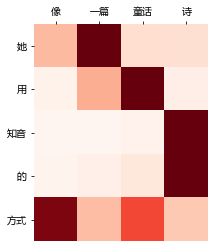

In [6]:
attention_visualization(dataset, net, "像一篇童话诗", "她用知音的方式")

In [7]:
song = generator("可惜没如果")
song

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['假如把犯得起的错',
 '能错的都错过',
 '应该有那么懂得感情',
 '都要在我的身边',
 '所有的梦都忘记',
 '我把心烧成火焰',
 '让怕黑的你拥着温暖入眠',
 '这一种加油不用回答',
 '一直一直一直走在一起',
 '你一直都想看我',
 '我写的歌是我的',
 '怎样的影子是我的',
 '只是我还是要',
 '只因为我',
 '任他们说他们看我都不管',
 '我只要宣布爱你的人就是我',
 '对没有错就是要',
 '简简单单就是我爱你爱我',
 '不需要啰嗦',
 '我想了就像简简单单的']

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


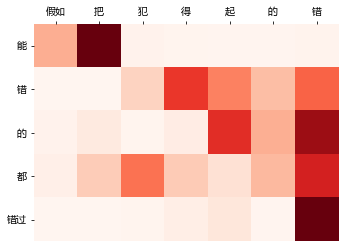

In [6]:
attention_visualization(dataset, net, "假如把犯得起的错", "能错的都错过", file_name="4")

In [13]:
generator("夜的第七章")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['你的心我的手都不懂',
 '一直一直在想你',
 '我是你的姓名',
 '你是我的',
 '我是谁的',
 '当你还没掉怎么就像',
 '怎么能舍得',
 '你的笑一点',
 '都是我',
 '如果有一天我有我',
 '什么时候我想你',
 '和你轮回以后',
 '只要你相信爱',
 '我的心有多美',
 '真的有你有我',
 '时间需要你的脸',
 '就让口袋转的',
 '天后会停了就像晴天',
 '回忆就在我们的距离',
 '我们就能自由']

In [15]:
generator("小幸运")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['从爱里降落',
 '是我选择才会自由',
 '为你再造所有',
 '不死的记忆',
 '那是无法避免的浩劫',
 '水窗外的沙漠',
 '有多少白天都会被祈祷',
 '只是情绪也让自己慢慢去燃烧',
 '当你的眼睛都会找到你的安慰',
 '爱情就像我们一样的距离',
 '就是最好拥抱',
 '手就不会单调',
 '我想我不会',
 '他的心我的心我的心都孤独',
 '我不要到处的所有渴望自己',
 '我只为你爱着我',
 '看到你的项链',
 '却不在我身旁',
 '这一路方向',
 '我们的世界没有人有']

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


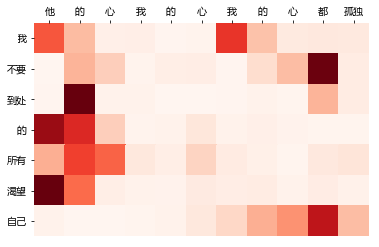

In [7]:
attention_visualization(dataset, net, "他的心我的心我的心都孤独", "我不要到处的所有渴望自己", file_name="5")

In [5]:
generator("那些你很冒险的梦")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['当两颗心开始震动',
 '从我们到未来',
 '所有爱都是',
 '一切都不重要',
 '我脆弱的心脆弱',
 '却不愿被遗忘',
 '我们的故事是油条',
 '你拥有的是我的我是你的微笑',
 '因为爱是曾经存在的地方',
 '带着我的双手',
 '就感觉舍不得看自己',
 '一起走过一起就一起',
 '说好不见不散',
 '每分每秒守候你到老',
 '不管你那侧眼睛会会有一些芬芳',
 '也许你还没说']